# **ЗАДАНИЕ 1. ПЕРВИЧНЫЙ АНАЛИЗ ВРЕМЕННОГО РЯДА С ИСПОЛЬЗОВАНИЕМ ОПИСАТЕЛЬНЫХ СТАТИСТИК И ВИЗУАЛИЗАЦИИ**

Проведите первичный анализ данных по ценам на материал 1 с использованием описательных статистик и визуализации, выявите неоднородность данных с помощью коэффициентов дифференциации и коэффициента фондов.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
!pip install --upgrade xlrd # установка модуля для EXELевских файлов

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Методика выполнения задания:**
# **Раздел 1. Загрузка данных и первичный анализ с использованием описательных статистик**


**1.	Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

**2.	Загрузите данные с помощью функции read_excel('data.xls', sheet_name='Material 1') из модуля pandas. Результат запишите в переменную data. Посмотрите на первые 5 наблюдений с помощью функции head().**

**3.	Поместите в переменную dates значения дат. Для этого с помощью метода loc укажите номер интересующей строки и с помощью метода values задайте координаты интересующих значений.**

**4.	Поместите в переменную val значения цен на материал 1 своего варианта. Для этого с помощью метода loc укажите номер интересующей строки и с помощью метода values задайте координаты интересующих значений.**

**5.	Создайте на основе переменных dates и val словарь с кодами Date и Value и поместите его в переменную data.**

**6.	Создайте на основе переменной data таблицу данных с помощью функции DataFrame() из модуля pandas. Результат присвойте переменной df. Посмотрите на первые 5 наблюдений с помощью функции head().**

**7.	Сделайте индексом столбец Date с помощью функции set_index('Date'). Результат присвойте переменной df. Посмотрите на первые 10 наблюдений с помощью функции head().**

**8.	Посмотрите на объем выборки с помощью атрибута size.**

**9.	Выведите на экран общую информацию о содержимом df с помощью функции info(). Прокомментируйте результат.**

**10.	 Убедитесь в том, что данные представлены в числовом формате. Если это не так, то обратитесь к значениям ряда Value и измените их тип с помощью функции astype(float). После этого убедитесь, что формат данных изменился с помощью функции info().**

**11.	 Выведите на экран данные за 2007 год в помесячной разбивке, обратившись к таблице данных по соответствующему индексу с помощью метода loc. Прокомментируйте результат.**

**12.	 Установите точность вывода результатов до 2-х знаков после запятой с помощью функции set_option('precision', 2) из модуля pandas.**

**13.	 Выведите на экран описательные статистики, воспользовавшись функцией describe(). Прокомментируйте результат.**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


In [ ]:
data.loc[data.index==0]

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00


In [ ]:
my_data = data.iloc[0:2,2:].T.rename(columns={0: 'Date', 1: 'Value'}).set_index('Date')
my_data.dtypes
#iloc[0:2,2:]                             - нарезал нужные строки и столбцы
#.T                                       - поверхул всё, т.е. транспонировал
#.rename(columns={0: 'Date', 1: 'Value'}) - поменял названия столбцов
# .set_index('Date')                      - сделал столбец с датами индексом

Value    object
dtype: object

In [ ]:
my_data.shape[0]

48

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [ ]:
my_data['Value'] = my_data['Value'].astype(float)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [ ]:
my_data.loc['2007']

,Value
Date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96
2007-06-01,25.58
2007-07-01,25.96
2007-08-01,30.56
2007-09-01,29.67


In [ ]:
pd.set_option('precision', 2)

In [ ]:
my_data.describe()

,Value
count,48.00
mean,34.36
std,5.44
min,23.89
25%,30.05
50%,34.35
75%,38.51
max,45.18


**14.	 Рассчитайте коэффициенты дифференциации:**

***Коэффициенты дифференциации*** – децильный (K_D), квартильный (K_Q) – показывают, во сколько раз нижняя граница 10% (25%) лучших превосходит верхнюю границу 10% (25%) худших значений измеряемого признака.

K_D=D_9/D_1

K_Q=Q_3/Q_1

Воспользуйтесь функцией quantile() для вычисления необходимых квантилей.


In [ ]:
d1=my_data.quantile(0.1) # нижний квантиль
d1

Value    27.44
Name: 0.1, dtype: float64

In [ ]:
d9=my_data.quantile(0.9) # верхний квантиль
d9

Value    41.27
Name: 0.9, dtype: float64

In [ ]:
kd=d9/d1 # коэффициент дифференциации
kd

Value    1.5
dtype: float64

In [ ]:
q1=my_data.quantile(0.25)
q1

Value    30.05
Name: 0.25, dtype: float64

In [ ]:
q3=my_data.quantile(0.75)
q3

Value    38.51
Name: 0.75, dtype: float64

In [ ]:
kd=q3/q1
kd

Value    1.28
dtype: float64

**15. Рассчитайте коэффициент фондов.**

***Коэффициент фондов (K_F)*** – показывает, во сколько раз среднее самых больших значений (x ̅_2, рассчитанное по 10% верхнего диапазона) больше среднего самых малых значений (x ̅_1, рассчитанное по 10% нижнего диапазона).

K_F=x ̅_2/x ̅_1


In [ ]:
#Коэффициент фондов:
mu=my_data['Value'][my_data['Value']>=my_data['Value'].quantile(0.9)].mean()
mu # нашли среднее значение для 10% наибольших данных

43.64200000000001

In [ ]:
ml=my_data['Value'][my_data['Value']<=my_data['Value'].quantile(0.1)].mean()
ml # нашли среднее значение для 10% наименьших данных


25.566000000000003

In [ ]:
kf=mu/ml # коэффициент фондов
kf

1.7070327779081595

In [ ]:
array=data.values

In [ ]:
X = my_data.values[:,0]

In [ ]:
X.sort() # сортируем данные от меньшего к большему
X

array([23.89, 25.58, 25.95, 25.96, 26.45, 27.87, 28.  , 28.6 , 28.96,
       29.67, 29.87, 30.03, 30.06, 30.46, 30.56, 31.09, 31.18, 31.57,
       31.73, 32.22, 33.85, 33.99, 34.01, 34.21, 34.49, 34.56, 35.49,
       35.92, 36.  , 36.08, 36.2 , 37.36, 37.5 , 37.74, 38.01, 38.27,
       39.21, 39.43, 39.51, 39.62, 39.68, 39.69, 40.75, 42.49, 42.84,
       43.5 , 44.2 , 45.18])

In [ ]:
first = int(len(X)*0.1) # расшифровка: нашли сколько значений составляют 10% данных
first

4

In [ ]:
lust = int(len(X)*0.9) # расшифровка: нашли сколько значений составляют 90% данных
lust

43

In [ ]:
first10 = X[0:first] # выводим 10% минимальных значений
first10

array([23.89, 25.58, 25.95, 25.96])

In [ ]:
lust10 = X[lust:len(X)] # выводим 10% максимальных значений
lust10

array([42.49, 42.84, 43.5 , 44.2 , 45.18])

# **Раздел 2. Первичный анализ данных с использованием визуализации**

**15.	 Постройте линейный график, воспользовавшись функцией plot() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

**16.	 Попробуйте изменить стиль графика, задав функцию plot(style='k.'), чтобы получить точечный график, и функцию plot(style='k--'), чтобы получить пунктирную линию.**

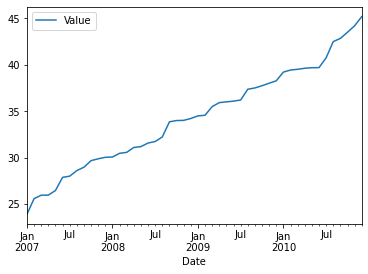

In [ ]:
my_data.plot()
plt.show()

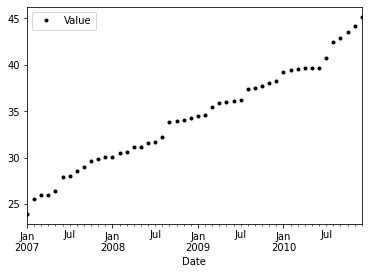

In [ ]:
my_data.plot(style='k.')
plt.show()

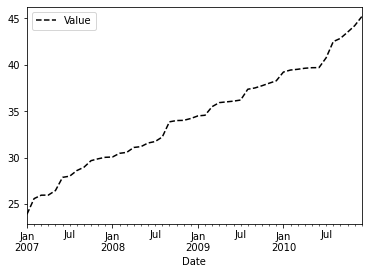

In [ ]:
my_data.plot(style='k--')
plt.show()

**17.	 Превратите объект DataFrame в переменной df в объект Series с помощью функции squeeze(). Результат запишите в переменную series.**

**18.	 Постройте сгруппированные по годам линейные графики. Это потребует выполнения следующих действий:**

**18.1.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze()**

**18.2.	Импортируйте функции DataFrame и Grouper из модуля pandas.**

**18.3.	Сгруппируйте временной ряд по годам с помощью функции groupby(Grouper(freq='A')) и поместите результат в переменную groups.**

**18.4.	Создайте пустую таблицу данных с помощью функции DataFrame() и поместите результат в переменную years.**

**18.5.	С помощью команды for, перебирая период (name) и данные (group), содержащиеся в переменной groups, создайте в таблице данных years столбцы для каждого года (name.year), заполненные соответствующими данными о ценах на материал 1 (group.values).**

**18.6.	Постройте линейные графики друг под другом для всех годов, воспользовавшись функцией plot(subplots=True, legend=True) и функцией show() из модуля matplotlib.pyplot. Настроить график можно с помощью модуля matplotlib.**


In [ ]:
series=my_data.squeeze() # превращаем DataFrame в Series
# type(series)
series.sample(4)

Date
2010-06-01    39.69
2010-04-01    39.62
2008-07-01    31.73
2007-09-01    28.96
Name: Value, dtype: float64

In [ ]:
series

Date
2007-01-01    23.89
2007-02-01    25.58
2007-03-01    25.95
2007-04-01    25.96
2007-05-01    26.45
2007-06-01    27.87
2007-07-01    28.00
2007-08-01    28.60
2007-09-01    28.96
2007-10-01    29.67
2007-11-01    29.87
2007-12-01    30.03
2008-01-01    30.06
2008-02-01    30.46
2008-03-01    30.56
2008-04-01    31.09
2008-05-01    31.18
2008-06-01    31.57
2008-07-01    31.73
2008-08-01    32.22
2008-09-01    33.85
2008-10-01    33.99
2008-11-01    34.01
2008-12-01    34.21
2009-01-01    34.49
2009-02-01    34.56
2009-03-01    35.49
2009-04-01    35.92
2009-05-01    36.00
2009-06-01    36.08
2009-07-01    36.20
2009-08-01    37.36
2009-09-01    37.50
2009-10-01    37.74
2009-11-01    38.01
2009-12-01    38.27
2010-01-01    39.21
2010-02-01    39.43
2010-03-01    39.51
2010-04-01    39.62
2010-05-01    39.68
2010-06-01    39.69
2010-07-01    40.75
2010-08-01    42.49
2010-09-01    42.84
2010-10-01    43.50
2010-11-01    44.20
2010-12-01    45.18
Name: Value, dtype: float64

In [ ]:
# группируем по годам
groups=series.groupby(Grouper(freq='A')) # 'A' - значит разбтвка по годам

In [ ]:
groups

In [ ]:
years=DataFrame() # создаем пустой DataFrame

# **!!! Разбиваем с помощью for данные по годам и строим график**

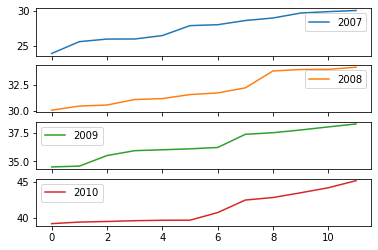

In [ ]:
for i, j in groups: # выводим графики для данных по годам
  years[i.year]=j.values
years.plot(subplots=True, legend=True)
plt.show()

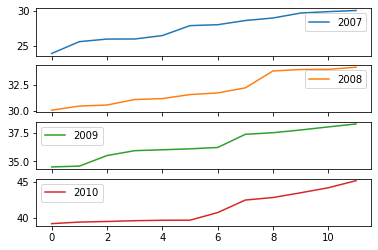

In [ ]:
for name, group in groups:
  years[name.year]=group.values
years.plot(subplots=True, legend=True)
plt.show()

**19.	 Постройте гистограмму для временного ряда, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

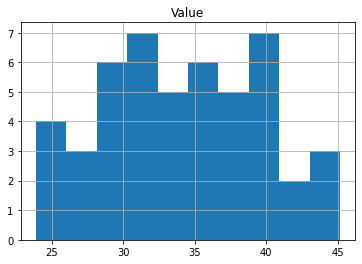

In [ ]:
my_data.hist()
plt.show()

**20.	 Постройте ядерную функцию плотности, воспользовавшись функцией plot(kind='kde') и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

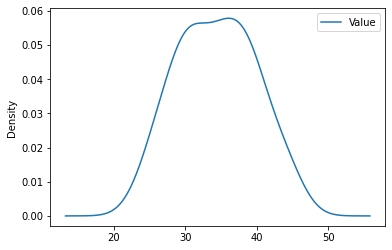

In [ ]:
my_data.plot(kind='kde')
plt.show()

**21.	 Постройте ящики с усами с разбивкой по годам, воспользовавшись функцией boxplot(), примененной к содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

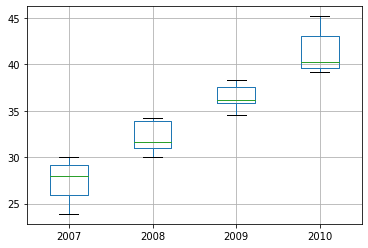

In [ ]:
years.boxplot()
plt.show()

**22.	 Постройте тепловую карту с разбивкой по годам, воспользовавшись функцией matshow(years.T, interpolation=None, aspect='auto') из модуля matplotlib.pyplot, примененной к транспонированному содержимому переменной years, и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

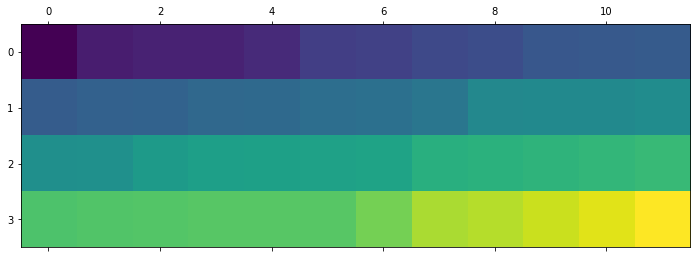

In [ ]:
plt.matshow(years.T, interpolation=None, aspect='auto')

plt.show()